<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 4:  Generate Descriptive Statistics and Visualizations

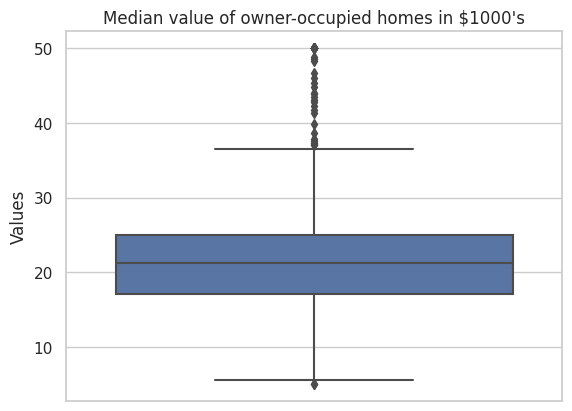

In [27]:
# For the "Median value of owner-occupied homes" provide a **boxplot**
ax = sns.boxplot(y='MEDV', data=boston_df).set(title='Median value of owner-occupied homes in $1000\'s')
pyplot.ylabel("Values")
pyplot.show()

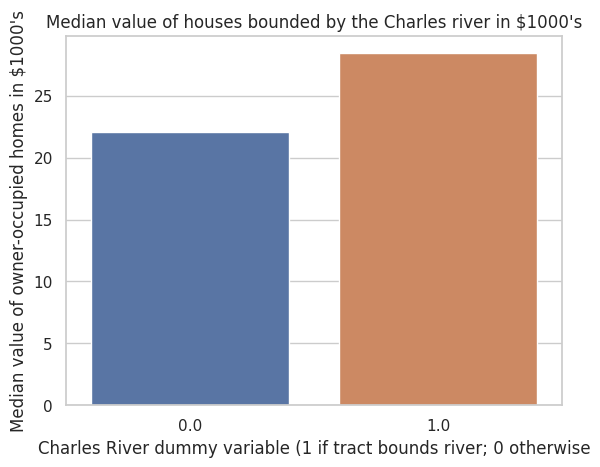

In [29]:
# Provide a **bar plot** for the Charles river variable
river_median = boston_df.groupby('CHAS')[['MEDV']].mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y="MEDV", data=river_median).set(title='Median value of houses bounded by the Charles river in $1000\'s')
pyplot.ylabel("Median value of owner-occupied homes in $1000\'s")
pyplot.xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise")
pyplot.show()

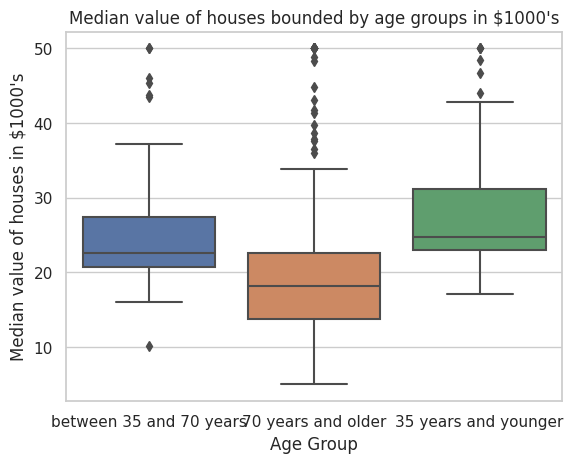

In [31]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger,
# between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df).set(title='Median value of houses bounded by age groups in $1000\'s')
pyplot.ylabel("Median value of houses in $1000\'s")
pyplot.xlabel("Age Group")
pyplot.show()

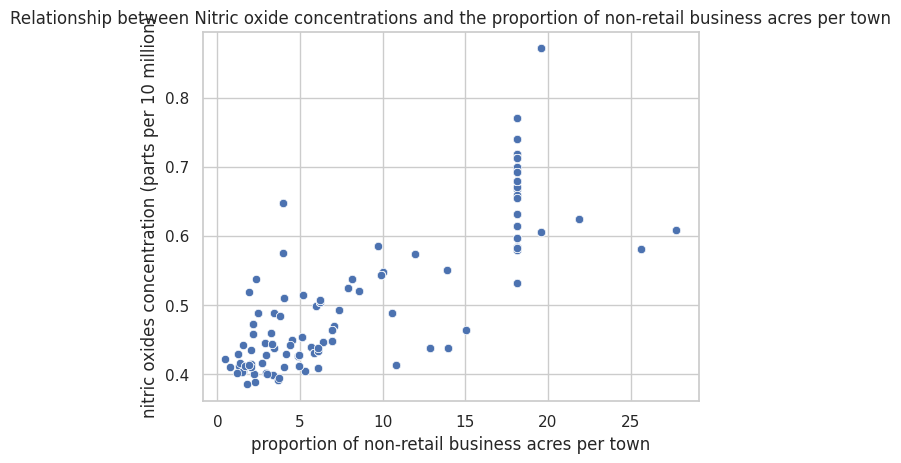

In [39]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set(title='Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel("proportion of non-retail business acres per town")
pyplot.ylabel("nitric oxides concentration (parts per 10 million)")
pyplot.show()

**Conclusion:** The more industrial the neighbourhood is, the higher contration of nitric oxides.

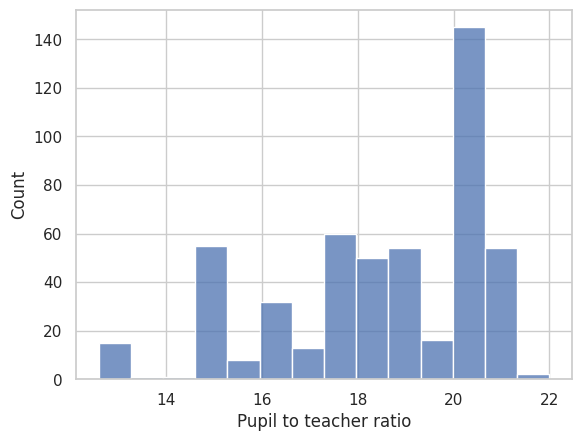

In [45]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)
pyplot.xlabel("Pupil to teacher ratio")
pyplot.show()

#### Task 5: Use the appropriate tests to answer the questions provided

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in median value of houses bounded by the Charles river")

In [52]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")
*   $H\_1: µ\_1 ≠ µ\_2$ ("There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)")

In [55]:
before_1940_medv = boston_df[boston_df['AGE'] > 83]['MEDV']
after_1940_medv = boston_df[boston_df['AGE'] <= 83]['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(before_1940_medv, after_1940_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 70.39023261064732, P-Value: 4.928713074749989e-16


**Conclusion:** Since the p-value is smaller than 0.05, we reject the null hypothesis as there is Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with Nitric oxide concentrations
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


In [56]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

**Conclusion:** Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and Nitric oxide concentrations.

##### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

We will state the null hypothesis:

*   $H\_0:$ An additional weighted distance to the five Boston employment centres is not correlated with the median value of owner occupied homes
*   $H\_1:$ An additional weighted distance to the five Boston employment centres is correlated with the median value of owner occupied homes

In [57]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        20:30:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between additional weighted distance and median value of owner occupied homes